# Практика 7-B

In [1]:
# Блок импортов
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

2024-05-27 02:54:29.220043: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-27 02:54:29.220221: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-27 02:54:29.222155: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-27 02:54:29.247272: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-27 02:54:29.794648: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

In [2]:
# Загрузка датасета
train_data = pd.read_csv('res/datasets/fashion-mnist_train.csv')
test_data = pd.read_csv('res/datasets/fashion-mnist_test.csv')

In [3]:
# Разделение на признаки и метки классов
x_train = train_data.drop('label', axis=1).values.astype('float32')
y_train = train_data['label'].values.astype('int32')
x_test = test_data.drop('label', axis=1).values.astype('float32')
y_test = test_data['label'].values.astype('int32')

# Преобразование данных в формат изображений (28x28)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Нормализация данных
x_train /= 255.0
x_test /= 255.0

# Разделение на обучающую и валидационную выборки
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [4]:
# Определение архитектуры модели
model = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
print(model.summary())

/home/lmoloch/Документы/Other/Liberman/sstu-lib78/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-27 02:54:32.780512: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-27 02:54:32.780778: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/in

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

None


In [5]:
# Компиляция модели
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Обучение модели
history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_val, y_val))

# Оценка модели на тестовом наборе данных
model.evaluate(x_test, y_test)
model.save('res/model_7-2.h5')

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7866 - loss: 0.5901 - val_accuracy: 0.8815 - val_loss: 0.3273
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8944 - loss: 0.2862 - val_accuracy: 0.9068 - val_loss: 0.2575
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9120 - loss: 0.2413 - val_accuracy: 0.9043 - val_loss: 0.2567
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9283 - loss: 0.1951 - val_accuracy: 0.9174 - val_loss: 0.2251
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9385 - loss: 0.1700 - val_accuracy: 0.9146 - val_loss: 0.2305
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9241 - loss: 0.2159


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


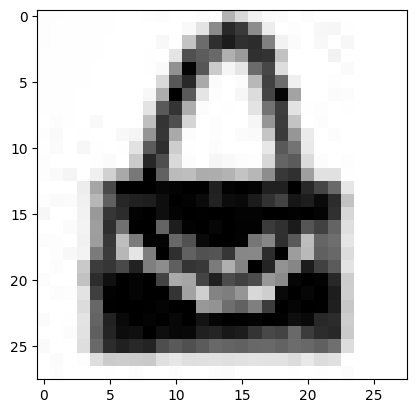

8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


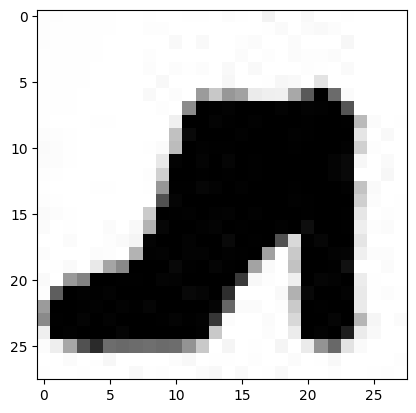

8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


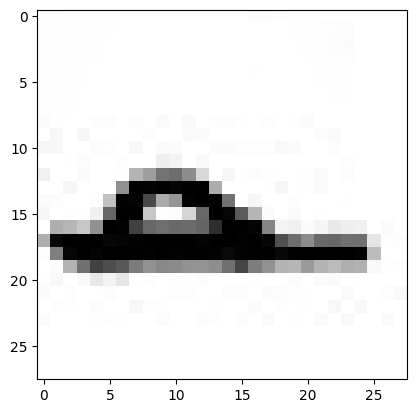

8


In [7]:
# Загрузка модели
new_model = keras.models.load_model('res/model_7-2.h5')

for i in 1, 2, 3:
	image = plt.imread('res/img/7-2/' + str(i) + '.jpg')
	image = np.mean(image, axis=2) / 255.0  # Преобразование в оттенки серого и нормализация

	# Добавление размерности к изображению для совместимости с входом модели
	image = np.expand_dims(image, axis=-1)
	image = np.expand_dims(image, axis=0)

	# Предсказание класса изображения
	predictions = new_model.predict(image)
	predicted_clothes = np.argmax(predictions)

	# Вывод результатов
	plt.imshow(image[0, :, :, 0], cmap='gray')
	plt.show()
	print(predicted_clothes)